# Avocado Dataset Prediction

1.Regression

2.Classification.

In [66]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import warnings:
import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'C:\\Users\\MI Laptop\\OneDrive\\Data Science'

In [133]:
#Reading the Dataset:
df = pd.read_csv('C:\\Users\\MI Laptop\\Downloads\\avocado.csv')
print(df.shape) #checking no of rows and columns in the dataset.
df.head()

(18249, 14)


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [134]:
#Dropping unnecessary Columns:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

False


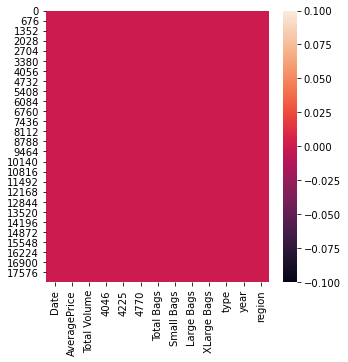

In [135]:
#Checking the null values in the dataset:
print(df.isnull().values.any())
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull())

In [136]:
#checking the datatypes:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [137]:
#Now lets check the categorical variable:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
print('categorigal variables is :',cat_col,end=" ")

categorigal variables is : ['Date', 'type', 'region'] 

In [138]:
#Checking the value count and unique value of each categorical feature:
for col in df.columns:
    if df[col].dtypes == object:
        print(str(col)+':'+str(df[col].unique()))
        print(df[col].value_counts())
        print('********************************************')

Date:['2015-12-27' '2015-12-20' '2015-12-13' '2015-12-06' '2015-11-29'
 '2015-11-22' '2015-11-15' '2015-11-08' '2015-11-01' '2015-10-25'
 '2015-10-18' '2015-10-11' '2015-10-04' '2015-09-27' '2015-09-20'
 '2015-09-13' '2015-09-06' '2015-08-30' '2015-08-23' '2015-08-16'
 '2015-08-09' '2015-08-02' '2015-07-26' '2015-07-19' '2015-07-12'
 '2015-07-05' '2015-06-28' '2015-06-21' '2015-06-14' '2015-06-07'
 '2015-05-31' '2015-05-24' '2015-05-17' '2015-05-10' '2015-05-03'
 '2015-04-26' '2015-04-19' '2015-04-12' '2015-04-05' '2015-03-29'
 '2015-03-22' '2015-03-15' '2015-03-08' '2015-03-01' '2015-02-22'
 '2015-02-15' '2015-02-08' '2015-02-01' '2015-01-25' '2015-01-18'
 '2015-01-11' '2015-01-04' '2016-12-25' '2016-12-18' '2016-12-11'
 '2016-12-04' '2016-11-27' '2016-11-20' '2016-11-13' '2016-11-06'
 '2016-10-30' '2016-10-23' '2016-10-16' '2016-10-09' '2016-10-02'
 '2016-09-25' '2016-09-18' '2016-09-11' '2016-09-04' '2016-08-28'
 '2016-08-21' '2016-08-14' '2016-08-07' '2016-07-31' '2016-07-24'
 '201

In [139]:
#Check the value count of categorical varibale:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [140]:
#Check the unique value of categorical varibale:
region = list(df['region'].unique())
print(region)

['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston', 'BuffaloRochester', 'California', 'Charlotte', 'Chicago', 'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork', 'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento', 'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina', 'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse', 'Tampa', 'TotalUS', 'West', 'WestTexNewMexico']


Statistical Analysis:

In [141]:
#Doing Statistical Analysis by using Describe Function
#Checking interquantile range.
#Checking mean median mode
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [76]:
#from above we can see the average price of avocado is 1.405978 and max is 3.25
#Theres a huge difference between 75% and max range in XLarge Bags possibility of presence of outliers.

Feature Engineering:

In [77]:
#Lets do some feature Engineering:
#renaming the columns name of 4046,4225,4770
df.rename(columns={'4046':'Small-HASS-sold','4225':'Large-HASS-sold','4770':'XLarge-HASS-sold'}, inplace=True)

In [78]:
#Now checking all columns:
columns = list(df.columns)
print(columns)

['Date', 'AveragePrice', 'Total Volume', 'Small-HASS-sold', 'Large-HASS-sold', 'XLarge-HASS-sold', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']


In [79]:
#From description we can see that Date is a object data type,Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

In [80]:
df['Day'] = pd.to_datetime(df['Date'], format="%Y/%m/%d").dt.day

In [81]:
df['month'] = pd.to_datetime(df['Date'], format="%Y/%m/%d").dt.month

Exploratory Data Analysis

1.Univarite Analysis

2.Multivariate Analysis

3.Bivariate Analysis

4.Here we check the relationship between different independant and dependant variable.

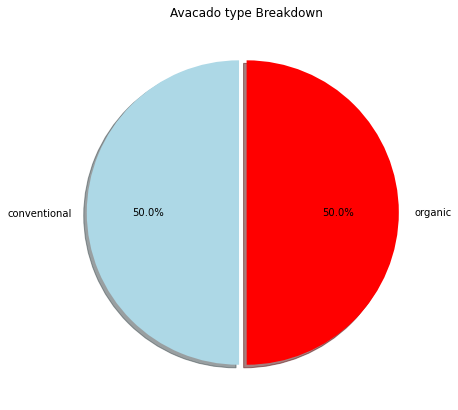

In [82]:
#univariate Analysis:
from pylab import rcParams 
labels = df['type'].value_counts(sort = True).index
sizes =  df['type'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0)
 
rcParams['figure.figsize'] = 7,7

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Avacado type Breakdown')
plt.show()

Observations: 50% is organic type and 50% is conventional type   

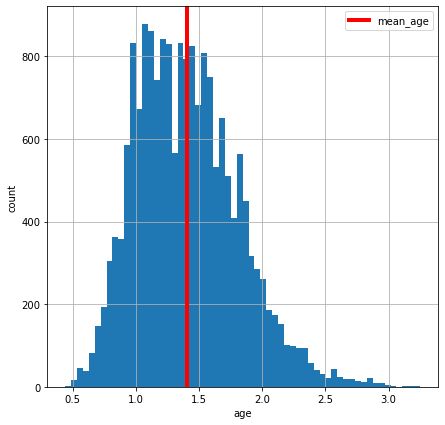

In [143]:
#Univariate Analysis checking the distribution of Average Price:
#Checking the mean of Average Price and the distribution:
age = df['AveragePrice'].hist(bins=60)
means_val = np.mean(df['AveragePrice'])
plt.axvline(means_val,linewidth=4,color='red',label='mean_age')
plt.xlabel('age')
plt.ylabel('count')
plt.legend()
plt.show()

Observations:
Most of Average price is Distributed in range of 1.0 to 1.8

Text(0.5, 0, 'Avg price of Avocado types')

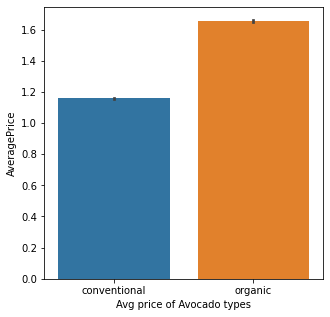

In [84]:
#Bivarite Analysis:
#Checking the relationship between two variables:
plt.figure(figsize=(5,5))
plt.xlabel("type")
plt.ylabel("Average price")
sns.barplot(x='type',y='AveragePrice',data=df)
plt.xlabel('Avg price of Avocado types')

Observations: Organic type are more expensive than Conventional ones

Text(0.5, 1.0, 'Year Vs Avg-Price')

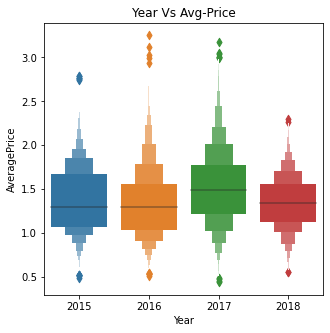

In [85]:
#Bivarite Analysis:
#Checking the relationship between two variables:
plt.figure(figsize=(5,5))
sns.boxenplot(x='year',y='AveragePrice',data=df)
plt.xlabel('Year')
plt.title("Year Vs Avg-Price")

Observations: Avg price was high in 2016 compared to different years.

                 region  AveragePrice
0   HartfordSpringfield        614.70
1          SanFrancisco        609.82
2               NewYork        583.92
3          Philadelphia        551.66
4            Sacramento        548.09
5             Charlotte        542.84
6             Northeast        541.45
7                Albany        527.63
8               Chicago        526.19
9     RaleighGreensboro        525.63
10  BaltimoreWashington        518.57
11               Boston        517.44
12             Syracuse        513.87
13     BuffaloRochester        512.69
14   HarrisburgScranton        511.49
15         Jacksonville        510.70
16              Orlando        509.10
17          GrandRapids        508.69
18   NorthernNewEngland        499.36
19              Spokane        488.61
20              Seattle        487.59
21               Plains        485.54
22              StLouis        483.55
23    MiamiFtLauderdale        482.83
24                Tampa        476.19
25          

Text(0.5, 1.0, 'Average price varies compare to different region')

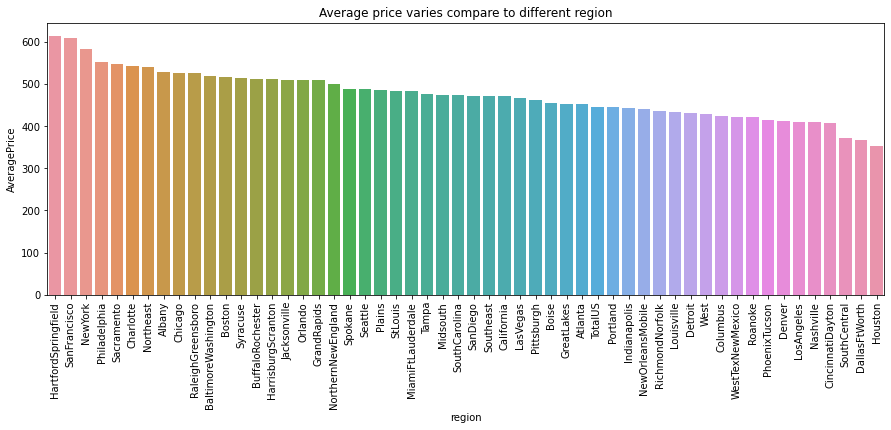

In [86]:
#How Average price varies compare to different region:
region = df.groupby('region')['AveragePrice'].sum().sort_values(ascending=False).reset_index()
print(region)
# Visualizing by bar plot
plt.figure(figsize=(15,5))
ax = sns.barplot(region['region'],region['AveragePrice'])
plt.xticks(rotation= 90)
plt.title("Average price varies compare to different region")

Observations: HartfordSpringfield being highest and Houston being lowest price to get cheap Avocado.

In [87]:
#Lets drop date column:
df.drop(columns='Date',axis=1,inplace=True)

In [88]:
#using Label Encoder to convert Categorical data into neumeric:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ["type","region"] 
for col in columns:
    df[col] = le.fit_transform(df[col])

In [89]:
#Checking for skewness:
#whether the features are right or left skewed.
#for right and left skewed we can use logarthim transformation.
#if the skewness value is greater than o.55 then the features are skewed.

In [90]:
df.skew()

AveragePrice         0.580303
Total Volume         9.007687
Small-HASS-sold      8.648220
Large-HASS-sold      8.942466
XLarge-HASS-sold    10.159396
Total Bags           9.756072
Small Bags           9.540660
Large Bags           9.796455
XLarge Bags         13.139751
type                 0.000329
year                 0.215339
region               0.000030
Day                  0.014310
month                0.106617
dtype: float64

In [91]:
import scipy.stats as stat
import pylab

In [92]:
#If you want to check whether feature is guassian or normal distributed
# Q-Q plot is used to check wheather the data are normally distributed or not by graphically.
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

<Figure size 360x360 with 0 Axes>

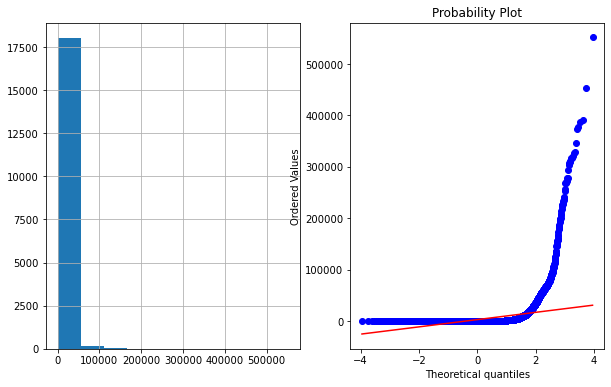

In [93]:
#We can check for skewness by using Distrution plot:
plt.figure(figsize=(5,5))
plot_data(df,'XLarge Bags')

<Figure size 360x360 with 0 Axes>

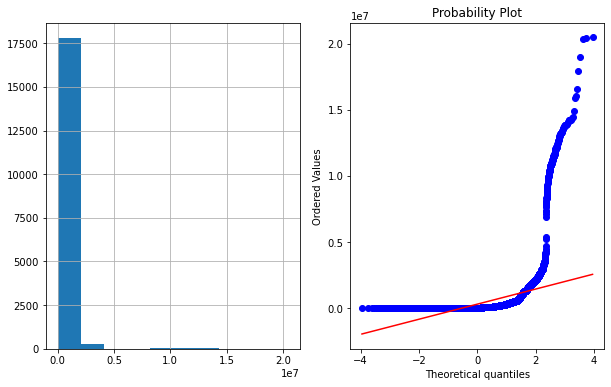

In [94]:
#We can check for skewness by using Distrution plot:
plt.figure(figsize=(5,5))
plot_data(df,'Large-HASS-sold')

In [95]:
#We can see that some of the features are not normally distributed skewness is present 
#for skewed Data Logarthim Tranformation works fine or we can also use Boxcox Method.
#If the skewness value is greater than 0.55 we consider that the feature is skewed.
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [96]:
#Checking for outliers
#outlier is a data point that differs significantly from other observations. 
#Any datapoint greater than +3 Standard Deviations and -3 SD are called Outliers
#Zscore is Automated method used to handle outliers.
#Let check wheather any outliers are present or not
from scipy.stats import zscore
zscore = abs(zscore(df))
print("Before removal of outliers:",df.shape)
df_final = df.loc[(zscore<3).all(axis=1)]
print("After removal of outliers:",df_final.shape)

Before removal of outliers: (18249, 14)
After removal of outliers: (17928, 14)


In [97]:
#Let Separate the input and output variable:
#Let select input and output value:
X = df_final.drop('AveragePrice',axis=1)
y = df_final['AveragePrice']

In [98]:
#Lets check the shape of input and output values:
print(X.shape)
print(y.shape)

(17928, 13)
(17928,)


In [99]:
#Breaking the model into training and testing split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [100]:
print(X_train.shape,'\t',X_test.shape)

(14342, 13) 	 (3586, 13)


In [101]:
print(y_train.shape,'\t',y_test.shape)

(14342,) 	 (3586,)


In [102]:
#Checking the coerelation:
#how the different neumerical features are corelated to each other 
#Their strength of relationship
#Their influence on target variable.
corrmat = X_train.corr()

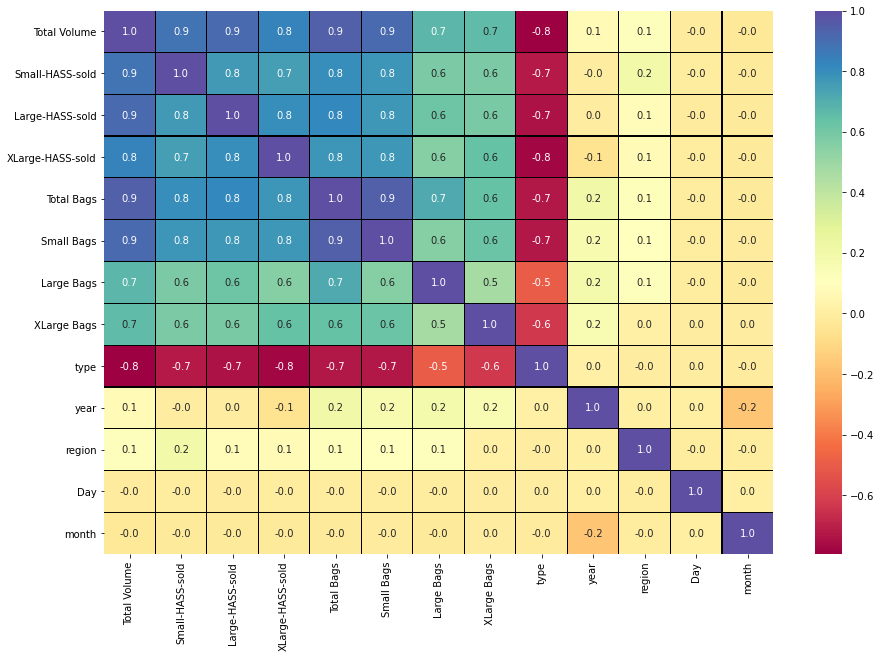

In [103]:
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(corrmat,annot=True,fmt=".1f",linewidths=.2,cmap="Spectral",ax=ax,linecolor="black")
plt.show()

Text(0.5, 1.0, 'corelation with target variable')

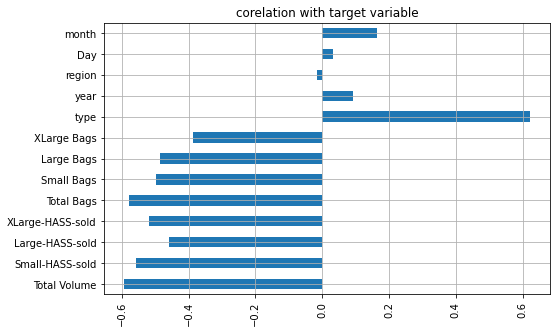

In [105]:
#corelation with target column:
plt.figure(figsize=(8,5))
df.drop('AveragePrice',axis=1).corrwith(df['AveragePrice']).plot(kind='barh',grid=True)
plt.xticks(rotation='vertical')
plt.title('corelation with target variable')

In [106]:
#Here we can see that some of the features are highly corealted with each hence these both feature will act as same.
#so as these features are highly corelated with each other they can behave as duplicate feature.
#Lets define a function and set a minimum threshold value to tackle the highly corelated feature:
def get_corelations(data, threshold):
    corr_col = set()  
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [107]:
corr_features = get_corelations(X_train, 0.85)
len(set(corr_features))

4

In [108]:
#Dropping the highly corelated columns:
X_train_uncorr = X_train.drop(labels=corr_features,axis=1)
X_test_uncorr =  X_test.drop(labels=corr_features,axis=1)

In [109]:
X_train_uncorr.shape, X_test_uncorr.shape

((14342, 9), (3586, 9))

In [110]:
#Redefining traing and testing data:
X_train_uncorr, X_test_uncorr, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [111]:
#Using StandardScaler to Preprocess the data:
#StandardScaler is used to bring the datapoints to standard normal distribution where mean = 0 and SD(+-)1:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_uncorr)
X_train_uncorr = scaler.transform(X_train_uncorr)
X_test_uncorr = scaler.transform(X_test_uncorr)

In [112]:
#Importing the Model for Predictions Process:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#Import Error Metrics:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [113]:
#Defining a function of getting the perfect random state for max r2 score:
def maxr2_score(regr,X,y):
    max_r_score = 0
    for r_state in range(42,101):
        X_train_uncorr, X_test_uncorr, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
        regr.fit(X_train_uncorr,y_train)
        y_pred = regr.predict(X_test_uncorr)
        r2_scr = r2_score(y_test,y_pred)
        print('r2_score corresponding to random state: ',r_state,"is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score = r2_scr
            final_r_state = r_state
    print("max_r_score corresponding to:",final_r_state,"is",max_r_score)
    return final_r_state

In [52]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
r_state = maxr2_score(lr,X,y)

r2_score corresponding to random state:  42 is  0.5811570479687466
r2_score corresponding to random state:  43 is  0.5811570479687466
r2_score corresponding to random state:  44 is  0.5811570479687466
r2_score corresponding to random state:  45 is  0.5811570479687466
r2_score corresponding to random state:  46 is  0.5811570479687466
r2_score corresponding to random state:  47 is  0.5811570479687466
r2_score corresponding to random state:  48 is  0.5811570479687466
r2_score corresponding to random state:  49 is  0.5811570479687466
r2_score corresponding to random state:  50 is  0.5811570479687466
r2_score corresponding to random state:  51 is  0.5811570479687466
r2_score corresponding to random state:  52 is  0.5811570479687466
r2_score corresponding to random state:  53 is  0.5811570479687466
r2_score corresponding to random state:  54 is  0.5811570479687466
r2_score corresponding to random state:  55 is  0.5811570479687466
r2_score corresponding to random state:  56 is  0.581157047968

In [53]:
#Lets do cross Validation.
from sklearn.model_selection import cross_val_score
print("mean r2_score for Linear Regression:",cross_val_score(lr,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for linear Regression:",cross_val_score(lr,X,y,cv=5,scoring="r2").std())

mean r2_score for Linear Regression: 0.26304040652794713
standard deviation in r2_score for linear Regression: 0.1684806045122706


In [54]:
#Lets Ckeck with Lasso Regression by performing hyperparametre Tuning:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [55]:
#Selecting the best alpha value:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
param = {'alpha':[0.001,0.01,0.1,1]}
grid = GridSearchCV(estimator=lasso,param_grid=param,cv=5,return_train_score=False)
grid.fit(X_train_uncorr,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1]})

In [56]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.001}
0.5698000540758432


In [57]:
#Using Best alpha value:
lasso = Lasso(alpha=0.001)
r_state = maxr2_score(lasso,X,y)

r2_score corresponding to random state:  42 is  0.5797048022326192
r2_score corresponding to random state:  43 is  0.5797048022326192
r2_score corresponding to random state:  44 is  0.5797048022326192
r2_score corresponding to random state:  45 is  0.5797048022326192
r2_score corresponding to random state:  46 is  0.5797048022326192
r2_score corresponding to random state:  47 is  0.5797048022326192
r2_score corresponding to random state:  48 is  0.5797048022326192
r2_score corresponding to random state:  49 is  0.5797048022326192
r2_score corresponding to random state:  50 is  0.5797048022326192
r2_score corresponding to random state:  51 is  0.5797048022326192
r2_score corresponding to random state:  52 is  0.5797048022326192
r2_score corresponding to random state:  53 is  0.5797048022326192
r2_score corresponding to random state:  54 is  0.5797048022326192
r2_score corresponding to random state:  55 is  0.5797048022326192
r2_score corresponding to random state:  56 is  0.579704802232

In [58]:
#Lets do cross Validation.
from sklearn.model_selection import cross_val_score
print("mean r2_score for Lasso Regression:",cross_val_score(lasso,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for lasso Regression:",cross_val_score(lasso,X,y,cv=5,scoring="r2").std())

mean r2_score for Lasso Regression: 0.25916732168076007
standard deviation in r2_score for lasso Regression: 0.1748010802200867


In [59]:
#Lets Ckeck with Ridge Regression by performing hyperparametre Tuning:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [60]:
#Selecting the best alpha value:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
param = {'alpha':[0.001,0.01,0.1,1]}
grid = GridSearchCV(estimator=ridge,param_grid=param,cv=5,return_train_score=False)
grid.fit(X_train_uncorr,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1]})

In [61]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 1}
0.5737383032133153


In [62]:
#Using Best alpha value:
ridge = Ridge(alpha=1)
r_state = maxr2_score(lasso,X,y)

r2_score corresponding to random state:  42 is  0.5797048022326192
r2_score corresponding to random state:  43 is  0.5797048022326192
r2_score corresponding to random state:  44 is  0.5797048022326192
r2_score corresponding to random state:  45 is  0.5797048022326192
r2_score corresponding to random state:  46 is  0.5797048022326192
r2_score corresponding to random state:  47 is  0.5797048022326192
r2_score corresponding to random state:  48 is  0.5797048022326192
r2_score corresponding to random state:  49 is  0.5797048022326192
r2_score corresponding to random state:  50 is  0.5797048022326192
r2_score corresponding to random state:  51 is  0.5797048022326192
r2_score corresponding to random state:  52 is  0.5797048022326192
r2_score corresponding to random state:  53 is  0.5797048022326192
r2_score corresponding to random state:  54 is  0.5797048022326192
r2_score corresponding to random state:  55 is  0.5797048022326192
r2_score corresponding to random state:  56 is  0.579704802232

In [63]:
#Lets do cross Validation.
from sklearn.model_selection import cross_val_score
print("mean r2_score for Ridge Regression:",cross_val_score(ridge,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for Ridge Regression:",cross_val_score(ridge,X,y,cv=5,scoring="r2").std())

mean r2_score for Ridge Regression: 0.26305298944028027
standard deviation in r2_score for Ridge Regression: 0.16848107578744925


In [ ]:
#We are not getting good scores in any of the model lets go for ensembling technique.

In [115]:
#First lets check which feature are more important:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [116]:
print(selection.feature_importances_)

[0.03966239 0.07450241 0.06078953 0.03644637 0.04332621 0.03551825
 0.07300702 0.0138651  0.38550018 0.07955005 0.04848171 0.01310154
 0.09624925]


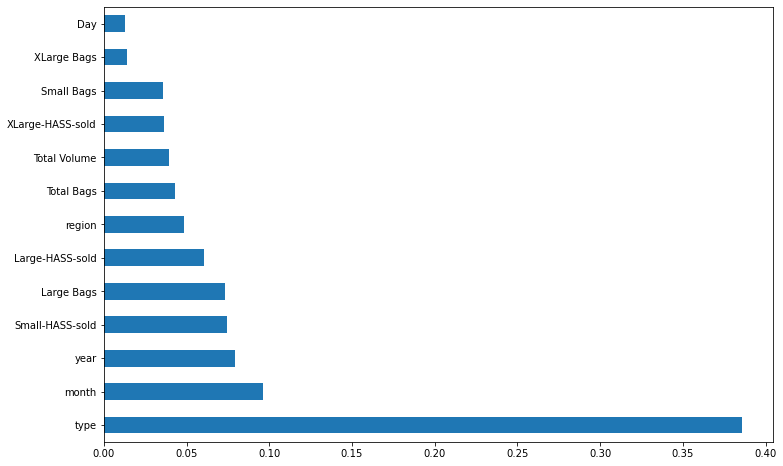

In [124]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [119]:
#Importing Random Forest:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [120]:
#Hyperparametre Tuning:

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [121]:
# Create the random grid:
random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf}

In [122]:
#Random search of parameters, using 5 fold cross validation:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [123]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  25.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  26.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  25.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  25.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  25.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  38.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 32.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [125]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [128]:
prediction = rf_random.predict(X_test)

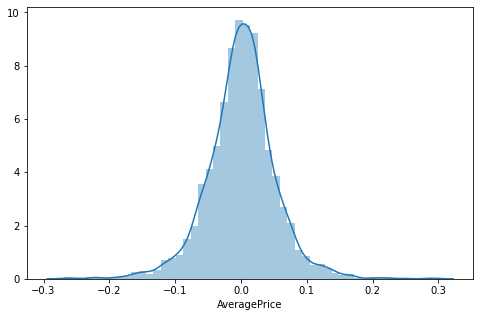

In [129]:
plt.figure(figsize = (8,5))
sns.distplot(y_test-prediction,bins=50)
plt.show()

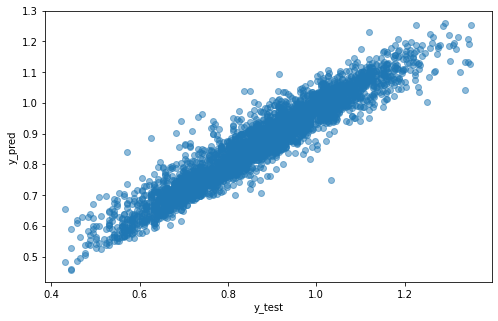

In [130]:
plt.figure(figsize = (8,5))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [131]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.037950743981258694
MSE: 0.0026736384161434174
RMSE: 0.05170723756055256


In [132]:
metrics.r2_score(y_test, prediction)

0.8998944914997044

****We can also solve this probelm by using classification by considering Avocado Type as Dependant Variable and other as independant Variable

In [177]:
#Lets Import The Dataset Again:
df = pd.read_csv('C:\\Users\\MI Laptop\\Downloads\\avocado.csv')
print(df.shape) #checking no of rows and columns in the dataset.
df.head()

(18249, 14)


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [178]:
#Dropping unnecessary Columns:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [179]:
#checking the value_count for type column:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [180]:
#Lets do some feature Engineering:
#renaming the columns name of 4046,4225,4770
df.rename(columns={'4046':'Small-HASS-sold','4225':'Large-HASS-sold','4770':'XLarge-HASS-sold'}, inplace=True)

In [181]:
#From description we can see that Date is a object data type,Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

In [182]:
df['Day'] = pd.to_datetime(df['Date'], format="%Y/%m/%d").dt.day

In [183]:
df['month'] = pd.to_datetime(df['Date'], format="%Y/%m/%d").dt.month

In [184]:
#Lets drop date column:
df.drop(columns='Date',axis=1,inplace=True)

In [185]:
df.dtypes

AveragePrice        float64
Total Volume        float64
Small-HASS-sold     float64
Large-HASS-sold     float64
XLarge-HASS-sold    float64
Total Bags          float64
Small Bags          float64
Large Bags          float64
XLarge Bags         float64
type                 object
year                  int64
region               object
Day                   int64
month                 int64
dtype: object

In [186]:
#using Label Encoder to convert Categorical data into neumeric:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ["type","region"] 
for col in columns:
    df[col] = le.fit_transform(df[col])

In [187]:
#Checking for skewness:
#whether the features are right or left skewed.
#for right and left skewed we can use logarthim transformation.
#if the skewness value is greater than o.55 then the features are skewed.

In [188]:
df.skew()

AveragePrice         0.580303
Total Volume         9.007687
Small-HASS-sold      8.648220
Large-HASS-sold      8.942466
XLarge-HASS-sold    10.159396
Total Bags           9.756072
Small Bags           9.540660
Large Bags           9.796455
XLarge Bags         13.139751
type                 0.000329
year                 0.215339
region               0.000030
Day                  0.014310
month                0.106617
dtype: float64

In [189]:
# we can clearly see the data are right Skewed hence we have to normalize it.

In [190]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [191]:
df.skew()

AveragePrice        0.138629
Total Volume        0.088098
Small-HASS-sold    -0.328195
Large-HASS-sold    -0.486654
XLarge-HASS-sold    0.099986
Total Bags         -0.218874
Small Bags         -0.622148
Large Bags         -0.547765
XLarge Bags         1.176494
type                0.000329
year                0.215339
region              0.000030
Day                 0.014310
month               0.106617
dtype: float64

In [192]:
#Checking for outliers
#outlier is a data point that differs significantly from other observations. 
#Any datapoint greater than +3 Standard Deviations and -3 SD are called Outliers
#Zscore is Automated method used to handle outliers.

In [193]:
#Let check wheather any outliers are present or not
from scipy.stats import zscore
zscore = abs(zscore(df))
print("Before removal of outliers:",df.shape)
df_final = df.loc[(zscore<3).all(axis=1)]
print("After removal of outliers:",df_final.shape)

Before removal of outliers: (18249, 14)
After removal of outliers: (17928, 14)


In [194]:
#Let Separate the input and output variable:
#Let select input and output value:
X = df_final.drop('type',axis=1)
y = df_final['type']

In [195]:
#Lets check the shape of input and output values:
print(X.shape)
print(y.shape)

(17928, 13)
(17928,)


In [196]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [197]:
print(X_train.shape,'\t',X_test.shape)

(14342, 13) 	 (3586, 13)


In [198]:
print(y_train.shape,'\t',y_test.shape)

(14342,) 	 (3586,)


In [199]:
#Checking the coerelation:
#how the different neumerical features are corelated to each other 
#Their strength of relationship
#Their influence on target variable.
corrmat = X_train.corr()

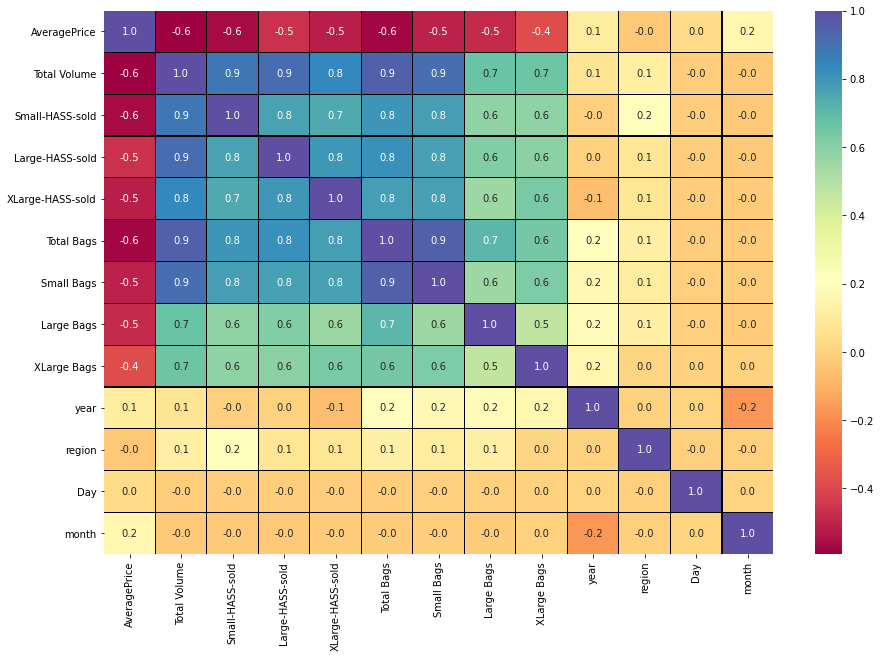

In [200]:
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(corrmat,annot=True,fmt=".1f",linewidths=.2,cmap="Spectral",ax=ax,linecolor="black")
plt.show()

In [ ]:
#Here we can see that some of the features are highly corealted with each hence these both feature will act as same.
#so as these features are highly corelated with each other they can behave as duplicate feature.
#Lets define a function and set a minimum threshold value to tackle the highly corelated feature:
def get_corelations(data, threshold):
    corr_col = set()  
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [201]:
corr_features = get_corelations(X_train, 0.85)
len(set(corr_features))

4

In [202]:
#Dropping the highly corelated columns:
X_train_uncorr = X_train.drop(labels=corr_features,axis=1)
X_test_uncorr =  X_test.drop(labels=corr_features,axis=1)

In [203]:
X_train_uncorr.shape, X_test_uncorr.shape

((14342, 9), (3586, 9))

In [204]:
#Redefining traing and testing data:
X_train_uncorr, X_test_uncorr, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [219]:
#Using StandardScaler to Preprocess the data:
#StandardScaler is used to bring the datapoints to standard normal distribution where mean = 0 and SD(+-)1:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [221]:
#Implementing Algorithim for predictions:
from sklearn.model_selection import cross_val_score
def classify(model,X,y):
    X_train_uncorr, X_test_uncorr, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    model.fit(X_train_uncorr,y_train)
    print("Accuracy Score of model is:",model.score(X_test_uncorr,y_test))
    score = cross_val_score(model,X,y,cv=5)
    print("Cross validation is",np.mean(score)*100)

In [222]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy Score of model is: 0.9656999442275516
Cross validation is 94.94642189018039


In [223]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy Score of model is: 0.9924707194645845
Cross validation is 96.90978320308095


In [224]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
classify(model, X, y)

Accuracy Score of model is: 0.9952593418851088
Cross validation is 97.65717912756955


In [225]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy Score of model is: 0.9974902398215282
Cross validation is 98.71143708564453


In [226]:
#As Logistic Regression is giving good Accuracy Lets Implement it and check the acuuracy:but keep in mind this is just a single training/test split; we need to confirm this performance holds for other splits. In addition, we need to tune the regularization hyperparameter. 
#Fortunately, there's a way to tackle both at the same time without introducing additional bias

In [227]:
#Implementing Algorithim
model = LogisticRegression()
model.fit(X_train_uncorr,y_train)

LogisticRegression()

In [211]:
#Lets perform Hyperparametre Tuning:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
param_grid = {'C': np.logspace(-3, 3, 10),'penalty':['l2','l1']}  
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42),verbose=0,n_jobs=-1,scoring='f1')

In [216]:
grid_search.fit(X_train_uncorr,y_train)
grid_search.best_params_

{'C': 2.154434690031882, 'penalty': 'l2'}

In [228]:
#Getting best Score:
print(grid_search.best_score_)

0.9423502510425825


accuracy_score: 0.9447852760736196
[[1733  115]
 [  83 1655]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1848
           1       0.94      0.95      0.94      1738

    accuracy                           0.94      3586
   macro avg       0.94      0.95      0.94      3586
weighted avg       0.94      0.94      0.94      3586



Text(0.5, 48.29999999999998, 'Predicted label')

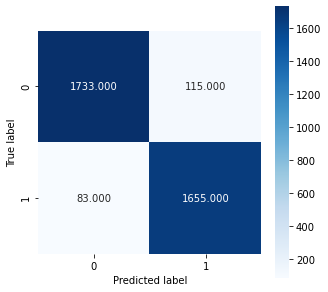

In [229]:
from sklearn.metrics import accuracy_score
model = LogisticRegression(C=2.154434690031882,penalty='l2')
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, annot_kws={"size":10}, cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [231]:
#Checking the mean scores
scores = cross_val_score(model,X_train_uncorr,y_train,cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42),scoring='f1',n_jobs=-1)

In [232]:
#Final mean score as the final measure of model performance.
scores.mean()

0.9423502510425825

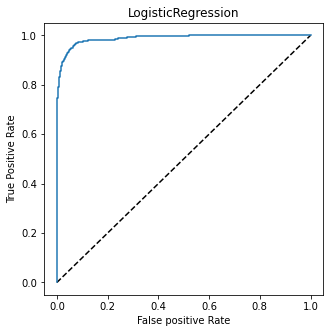

0.9450072606718177


In [235]:
#AUC and ROC Curve:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob = model.predict_proba(X_test)[:,1]
tpr,fpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label ='LogisticRegression')
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression')
plt.show()

auc_score = roc_auc_score(y_test,y_predict)
print(auc_score)

In [236]:
#Saving the best Model: Logistic Regression:
#Saving the best Model:
import joblib
joblib.dump(model,'model.obj')
model_from_joblib = joblib.load('model.obj')
model_from_joblib.predict(X_test)[:40]

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])